# Implementing Feed Forward Neural Networks
FALL-99 A#5 phase2

Bahar Emami Afshar

STD number: 810197662


---


*Abstract*: In this project we're going to implement a neural network using keras tensorflow model and test it on covid19 dataset.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/xray.zip" .

In [ ]:
!unzip xray.zip

In [ ]:
from tensorflow.keras import *
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import *


# 1. Reading Data

In [ ]:
DataGenerator = preprocessing.image.ImageDataGenerator(
    rescale= 1
)

In [ ]:

TrainData_unshuffle = DataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32,
    shuffle=False
    )
TestData_unshuffle = DataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32,
    shuffle=False
    )

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
TrainData = DataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32
    )

Found 5144 images belonging to 3 classes.


In [ ]:
TestData = DataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32
    )

Found 1288 images belonging to 3 classes.


# 2. Visualizing Data
# 2.I

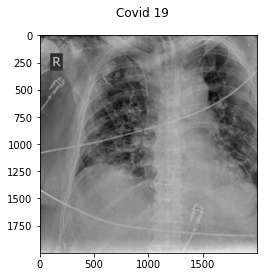

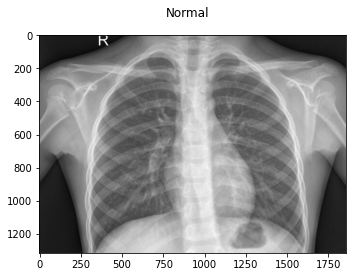

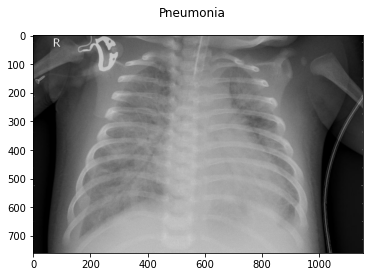

In [ ]:
class1 = plt.imread("/content/Data/train/COVID19/COVID19(0).jpg")
fig = plt.figure()
fig.suptitle('Covid 19')
plt.imshow(class1, cmap='gray')

class2 = plt.imread("/content/Data/train/NORMAL/NORMAL(0).jpg")
fig = plt.figure()
fig.suptitle('Normal')
plt.imshow(class2, cmap='gray')

class3 = plt.imread("/content/Data/train/PNEUMONIA/PNEUMONIA(0).jpg")
fig = plt.figure()
fig.suptitle('Pneumonia')
plt.imshow(class3, cmap='gray')


# 2. II

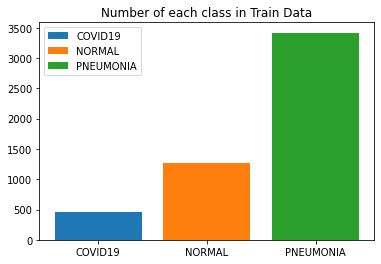

In [ ]:
unique, counts = np.unique(TrainData.classes, return_counts=True)

label = ["COVID19","NORMAL","PNEUMONIA"]
for i in range(len(counts)):

  plt.bar(label[i],counts[i])

plt.title("Number of each class in Train Data")
plt.legend(label)

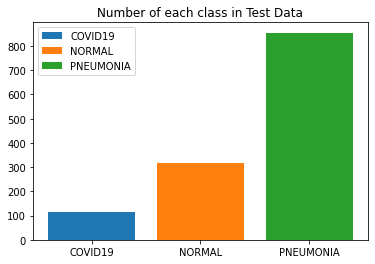

In [ ]:
unique, counts = np.unique(TestData.classes, return_counts=True)

label = ["COVID19","NORMAL","PNEUMONIA"]
for i in range(len(counts)):

  plt.bar(label[i],counts[i])

plt.title("Number of each class in Test Data")
plt.legend(label)

# 3. Creating Network

the details of model and number of parameters are written in model summary.
we can get
 1. layers and model architecture
 2. number of parameters in each layer
 3. input shape of each layer
 4. number of total parameteres including trinables and non-trainables

first layer input is images with shape of (80*80) after flattening them, the shape becomes (1,6400). so at first hidden layer we habe 1024*6400 + 1024(bias vector) which is equal to 6,554,624.

second hidden layer contain 1024+1(bias) neurons and with 1024 neurons from previous layer we have a total of 1024*1025 = 1,049,600 parameters for this layer.

in output layer we have 1024 + 1(bias) neurons for 3 classes which equals to 1025*3 = 3075 parameters for last layer.


In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)

model = models.Model(inputs= input_layer,outputs= out)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss= "categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


# 4. Activation Functions

# 4.i. Relu
relu function differs from 0 to 1. so when it gets un-normalized data it will not get good result as it will overflow. so as expected we got low accuracy rate here and loss values will be nan.

to solve this problem we have to normalaize our data and rescale every image by 1/255.0.

In [ ]:
history = model.fit(TrainData,validation_data= TestData, epochs= 10)

Epoch 1/10
161/161 [==============================] - 181s 1s/step - loss: nan - accuracy: 0.1444 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 180s 1s/step - loss: nan - accuracy: 0.0899 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 179s 1s/step - loss: nan - accuracy: 0.0872 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 179s 1s/step - loss: nan - accuracy: 0.0927 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 179s 1s/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 179s 1s/step - loss: nan - accuracy: 0.0960 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 179s 1s/step - loss: nan - accuracy: 0.0878 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [=====================

In [ ]:
def plot_result(history):
    plt.plot(np.linspace(0, len(history.epoch), num=len(history.epoch)),history.history['accuracy'],label= 'Train')
    plt.plot(np.linspace(0, len(history.epoch), num=len(history.epoch)),history.history['val_accuracy'],label= 'Test')
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    plt.plot(np.linspace(0, len(history.epoch), num=len(history.epoch)),history.history['loss'],label= 'Train')
    plt.plot(np.linspace(0, len(history.epoch), num=len(history.epoch)),history.history['val_loss'],label= 'Test')
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


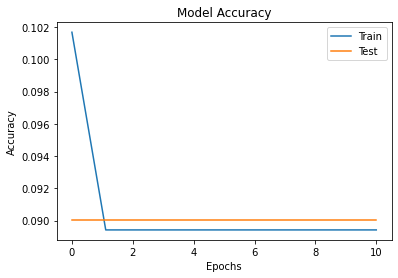

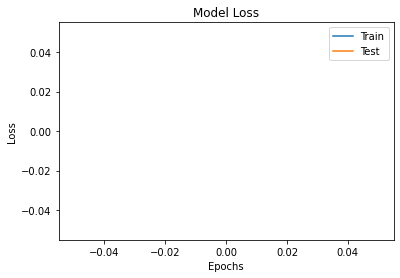

In [ ]:
plot_result(history)

In [ ]:
def print_report(Data,model):
    preds = model.predict(Data)
    preds = preds.argmax(axis=1)
    true = Data.labels
    print(classification_report(true, preds,target_names=Data.class_indices))




In [ ]:
print_report(TrainData_unshuffle,model)

              precision    recall  f1-score   support

     COVID19       0.09      1.00      0.16       460
      NORMAL       0.00      0.00      0.00      1266
   PNEUMONIA       0.00      0.00      0.00      3418

    accuracy                           0.09      5144
   macro avg       0.03      0.33      0.05      5144
weighted avg       0.01      0.09      0.01      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print_report(TestData_unshuffle,model)

              precision    recall  f1-score   support

     COVID19       0.09      1.00      0.17       116
      NORMAL       0.00      0.00      0.00       317
   PNEUMONIA       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4.ii. tanh

tanh differs from -1 to 1. it will prevent the overflow problem we had with relu. but as our steps decreases the derivation of tanh converges to 0 so after some times weights will be updated slowly, and this will result in an uncomplete model which takes along time to be fitted perefctly.

normalizing can help to solve this problem.

# 4.iii.
the results are different because of the difference in output range of activation functions.
both models are simillar from the prespective that they both need normalized input data to fit well.

In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='tanh')(layer)
layer = layers.Dense(1024,activation='tanh')(layer)
out = layers.Dense(3,activation='softmax')(layer)

model2 = models.Model(inputs= input_layer,outputs= out)

model2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss= "categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(TrainData,validation_data= TestData, epochs= 10)

Epoch 1/10
161/161 [==============================] - 181s 1s/step - loss: 1.5060 - accuracy: 0.5502 - val_loss: 1.2794 - val_accuracy: 0.6615
Epoch 2/10
161/161 [==============================] - 179s 1s/step - loss: 1.0393 - accuracy: 0.5993 - val_loss: 1.0530 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 179s 1s/step - loss: 0.8966 - accuracy: 0.6435 - val_loss: 0.8892 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 179s 1s/step - loss: 0.8782 - accuracy: 0.6437 - val_loss: 0.9113 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 179s 1s/step - loss: 0.8715 - accuracy: 0.6609 - val_loss: 0.9685 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 180s 1s/step - loss: 0.8836 - accuracy: 0.6458 - val_loss: 0.9681 - val_accuracy: 0.2461
Epoch 7/10
161/161 [==============================] - 180s 1s/step - loss: 0.8838 - accuracy: 0.6412 - val_loss: 0.9145 - val_accuracy: 0.6638

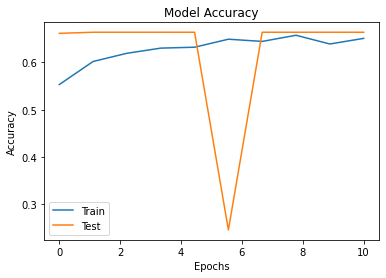

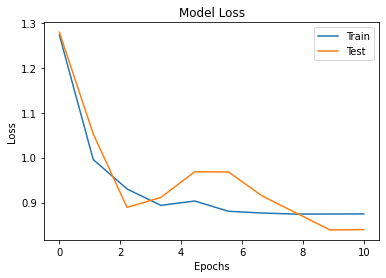

In [ ]:
plot_result(history2)


In [ ]:
print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model2)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model2)

------------------Train classification report-----------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00       460
      NORMAL       0.00      0.00      0.00      1266
   PNEUMONIA       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00       116
      NORMAL       0.00      0.00      0.00       317
   PNEUMONIA       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



# 5. Normalizing Data
as mentioned in previous sections we need to normalize our data by resclaing each image by 1/255.0.

after trying different architectures(increasing hidden layers and changing neurons of each layer) the optimal model was chosen.

from now on we work with this optimal architecture.

In [ ]:
DataGenerator = preprocessing.image.ImageDataGenerator(
    rescale= 1/255.0
)
TrainData = DataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32
    )
TestData = DataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size= 32
    )

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)

model = models.Model(inputs= input_layer,outputs= out)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss= "categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(TrainData,validation_data= TestData, epochs= 10)

Epoch 1/10
161/161 [==============================] - 180s 1s/step - loss: 0.7038 - accuracy: 0.7153 - val_loss: 0.2924 - val_accuracy: 0.9161
Epoch 2/10
161/161 [==============================] - 178s 1s/step - loss: 0.3670 - accuracy: 0.8598 - val_loss: 0.4658 - val_accuracy: 0.7911
Epoch 3/10
161/161 [==============================] - 179s 1s/step - loss: 0.3523 - accuracy: 0.8701 - val_loss: 0.2349 - val_accuracy: 0.9286
Epoch 4/10
161/161 [==============================] - 179s 1s/step - loss: 0.2947 - accuracy: 0.8878 - val_loss: 0.2558 - val_accuracy: 0.8890
Epoch 5/10
161/161 [==============================] - 179s 1s/step - loss: 0.2602 - accuracy: 0.9024 - val_loss: 0.2543 - val_accuracy: 0.9022
Epoch 6/10
161/161 [==============================] - 178s 1s/step - loss: 0.2537 - accuracy: 0.9040 - val_loss: 0.2274 - val_accuracy: 0.9115
Epoch 7/10
161/161 [==============================] - 178s 1s/step - loss: 0.2340 - accuracy: 0.9135 - val_loss: 0.1812 - val_accuracy: 0.9293

------------------Normalization-----------------


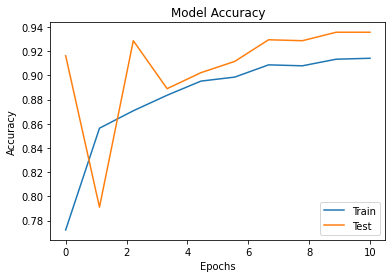

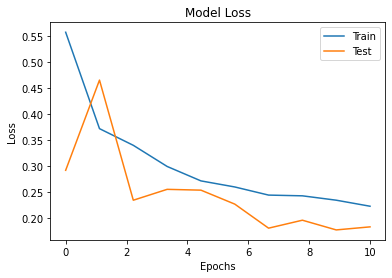

------------------Train classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.84      0.92      0.88       460
      NORMAL       0.86      0.91      0.88      1266
   PNEUMONIA       0.96      0.93      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.89      0.92      0.90      5144
weighted avg       0.93      0.93      0.93      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.84      0.96      0.90       116
      NORMAL       0.88      0.92      0.90       317
   PNEUMONIA       0.97      0.93      0.95       855

    accuracy                           0.93      1288
   macro avg       0.90      0.94      0.92      1288
weighted avg       0.94      0.93      0.93      1288



In [ ]:
print("------------------Normalization-----------------")
plot_result(history)

print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model)

# 6. Optimizers

i. Instead of using only the gradient of the current step to guide the search, momentum also accumulates the gradient of the past steps to determine the direction to go. so it helps model to converge to optimal points faster.

ii. different momentums were tested and results are as below. best accuracy and the lowest loss happened in model with momentum = 0.9. low momentums will stuck the model in local optimums.

iii. using very large momentums is not usefull because in this case the model will change so quickly and it will get further from the optimal result.

In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)

model3 = models.Model(inputs= input_layer,outputs= out)

In [ ]:


momentums = [0.5,0.9,0.99]
histories = []
models = []
for i in range(len(momentums)):
    print("------------------Momentum = "+ str(momentums[i]) + "------------------")
    model3.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=momentums[i]),
                  loss= "categorical_crossentropy",
                  metrics=['accuracy'])
    models.append(model3)
    history = model3.fit(TrainData,validation_data= TestData, epochs= 10)
    histories.append(history)

------------------Momentum = 0.5------------------
Epoch 1/10
161/161 [==============================] - 194s 1s/step - loss: 0.1363 - accuracy: 0.9530 - val_loss: 0.1617 - val_accuracy: 0.9433
Epoch 2/10
161/161 [==============================] - 196s 1s/step - loss: 0.1247 - accuracy: 0.9533 - val_loss: 0.1543 - val_accuracy: 0.9418
Epoch 3/10
161/161 [==============================] - 195s 1s/step - loss: 0.1207 - accuracy: 0.9568 - val_loss: 0.1651 - val_accuracy: 0.9433
Epoch 4/10
161/161 [==============================] - 191s 1s/step - loss: 0.1355 - accuracy: 0.9546 - val_loss: 0.1502 - val_accuracy: 0.9433
Epoch 5/10
161/161 [==============================] - 192s 1s/step - loss: 0.1130 - accuracy: 0.9582 - val_loss: 0.1706 - val_accuracy: 0.9418
Epoch 6/10
161/161 [==============================] - 192s 1s/step - loss: 0.1108 - accuracy: 0.9603 - val_loss: 0.1533 - val_accuracy: 0.9457
Epoch 7/10
161/161 [==============================] - 193s 1s/step - loss: 0.1129 - accurac

------------------Momentum = 0.5------------------


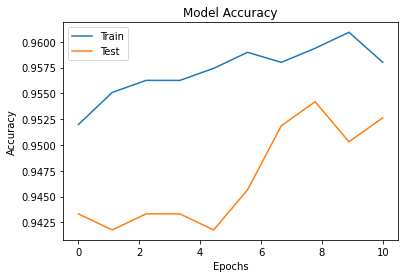

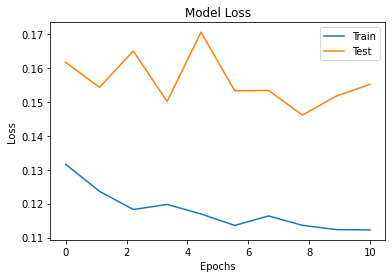

------------------Momentum = 0.9------------------


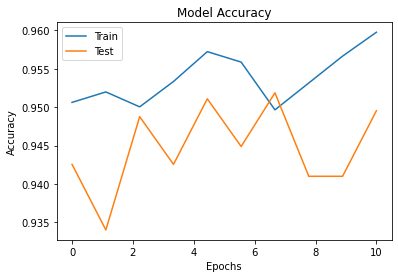

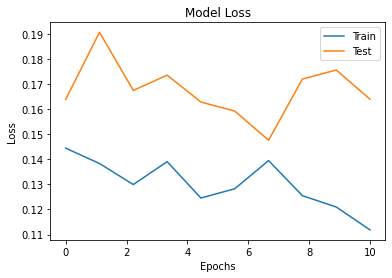

------------------Momentum = 0.99------------------


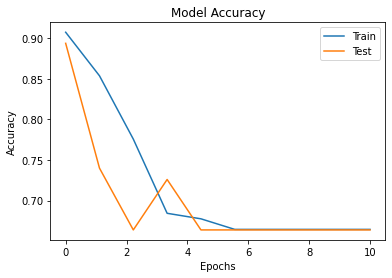

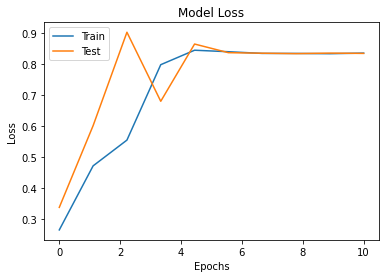

In [ ]:
for i in range(len(histories)):
  print("------------------Momentum = "+ str(momentums[i]) + "------------------")
  plot_result(histories[i])

iv. Adam optimizer is much more faster than SGD, the results were just fine. but in some cases although adam is much faster it is not necessarily more accurate than SGD.

In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)

model3 = models.Model(inputs= input_layer,outputs= out)
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss= "categorical_crossentropy",
              metrics=['accuracy'])
history4 = model3.fit(TrainData,validation_data= TestData, epochs= 10)

Epoch 1/10
161/161 [==============================] - 182s 1s/step - loss: 1.6242 - accuracy: 0.6980 - val_loss: 0.2273 - val_accuracy: 0.9161
Epoch 2/10
161/161 [==============================] - 181s 1s/step - loss: 0.3145 - accuracy: 0.8822 - val_loss: 0.2921 - val_accuracy: 0.8936
Epoch 3/10
161/161 [==============================] - 180s 1s/step - loss: 0.3117 - accuracy: 0.8809 - val_loss: 0.2216 - val_accuracy: 0.9177
Epoch 4/10
161/161 [==============================] - 180s 1s/step - loss: 0.2526 - accuracy: 0.9029 - val_loss: 0.2171 - val_accuracy: 0.9169
Epoch 5/10
161/161 [==============================] - 180s 1s/step - loss: 0.2534 - accuracy: 0.9042 - val_loss: 0.3096 - val_accuracy: 0.8727
Epoch 6/10
161/161 [==============================] - 181s 1s/step - loss: 0.2405 - accuracy: 0.9084 - val_loss: 0.1871 - val_accuracy: 0.9309
Epoch 7/10
161/161 [==============================] - 180s 1s/step - loss: 0.2338 - accuracy: 0.9079 - val_loss: 0.1670 - val_accuracy: 0.9410

------------------Adam Optimizer-----------------


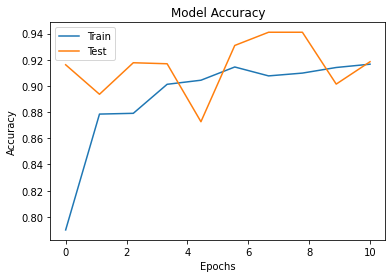

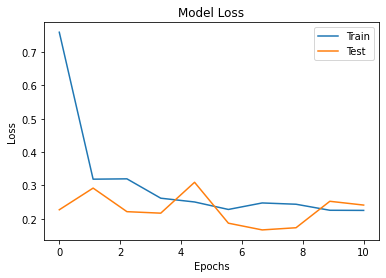

------------------Train classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.94      0.89      0.92       460
      NORMAL       0.74      0.96      0.84      1266
   PNEUMONIA       0.98      0.88      0.92      3418

    accuracy                           0.90      5144
   macro avg       0.89      0.91      0.89      5144
weighted avg       0.92      0.90      0.90      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.94      0.89      0.91       116
      NORMAL       0.78      0.96      0.86       317
   PNEUMONIA       0.97      0.90      0.94       855

    accuracy                           0.91      1288
   macro avg       0.90      0.92      0.90      1288
weighted avg       0.92      0.91      0.92      1288



In [ ]:
print("------------------Adam Optimizer-----------------")
plot_result(history4)

print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model3)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model3)

# 7. Epochs

ii.
we need to train our model several epochs to achive an optimal model. this means that with every epoch data is once again analyzed and weights are updated in a direction to meet optimal values.

iii. overfitting happens when the number of epochs extends its limit. in this case model kinda memorizes the train data and will get high accuracy but when it comes to test data it will fail, because it is too sepecialized with the train data. to prevent this we use a methos called early stoping.


In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)
model3 = models.Model(inputs= input_layer,outputs= out)
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss= "categorical_crossentropy",
                  metrics=['accuracy'])
history5 = model3.fit(TrainData,validation_data= TestData, epochs= 20)


Epoch 1/20
161/161 [==============================] - 181s 1s/step - loss: 2.6265 - accuracy: 0.6430 - val_loss: 0.2681 - val_accuracy: 0.9037
Epoch 2/20
161/161 [==============================] - 180s 1s/step - loss: 0.3045 - accuracy: 0.8923 - val_loss: 0.2034 - val_accuracy: 0.9255
Epoch 3/20
161/161 [==============================] - 180s 1s/step - loss: 0.2956 - accuracy: 0.8889 - val_loss: 0.1871 - val_accuracy: 0.9317
Epoch 4/20
161/161 [==============================] - 181s 1s/step - loss: 0.2807 - accuracy: 0.8892 - val_loss: 0.1829 - val_accuracy: 0.9356
Epoch 5/20
161/161 [==============================] - 183s 1s/step - loss: 0.2505 - accuracy: 0.9078 - val_loss: 0.3292 - val_accuracy: 0.8579
Epoch 6/20
161/161 [==============================] - 181s 1s/step - loss: 0.2701 - accuracy: 0.8866 - val_loss: 0.3527 - val_accuracy: 0.8634
Epoch 7/20
161/161 [==============================] - 181s 1s/step - loss: 0.2324 - accuracy: 0.9167 - val_loss: 0.2327 - val_accuracy: 0.9154

-----------------Epochs = 20 -----------------


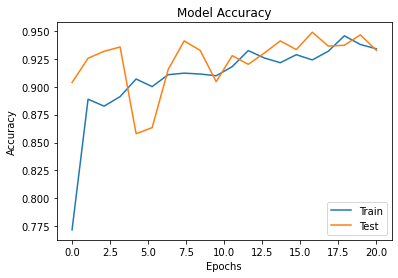

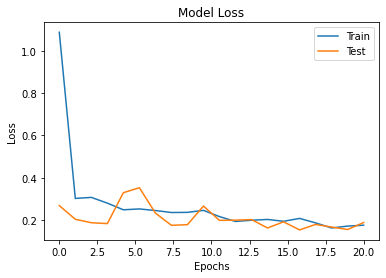

------------------Train classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.89      0.96      0.93       460
      NORMAL       0.97      0.83      0.89      1266
   PNEUMONIA       0.94      0.98      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.93      0.92      0.93      5144
weighted avg       0.94      0.94      0.94      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.86      0.93      0.90       116
      NORMAL       0.94      0.85      0.89       317
   PNEUMONIA       0.94      0.97      0.96       855

    accuracy                           0.93      1288
   macro avg       0.92      0.91      0.91      1288
weighted avg       0.94      0.93      0.93      1288



In [ ]:
print("-----------------Epochs = 20 -----------------")
plot_result(history5)

print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model3)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model3)

# 8. Loss Functions

i. as it is obvious from the plots, loss values obtained with MSE functions tend to be constant, so the weights will not be updated and classification meausurements are low.

ii. using MSE function means that we have assumed that our dataset has a normal distribution. but our dataset is not generated from a normal distribution so MSE will not work here.
MSE usually works well with regression problems where the output is a numerical value. but this problem is a classification problem.


In [ ]:
input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dense(1024,activation='relu')(layer)
out = layers.Dense(3,activation='softmax')(layer)
model4 = models.Model(inputs= input_layer,outputs= out)
model4.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])
history6 = model4.fit(TrainData,validation_data= TestData, epochs= 10)

Epoch 1/10
161/161 [==============================] - 183s 1s/step - loss: 0.2325 - accuracy: 0.6388 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 181s 1s/step - loss: 0.2181 - accuracy: 0.6729 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 181s 1s/step - loss: 0.2253 - accuracy: 0.6621 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 188s 1s/step - loss: 0.2198 - accuracy: 0.6702 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 194s 1s/step - loss: 0.2243 - accuracy: 0.6635 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 193s 1s/step - loss: 0.2305 - accuracy: 0.6543 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 194s 1s/step - loss: 0.2182 - accuracy: 0.6726 - val_loss: 0.2241 - val_accuracy: 0.6638

------------------MSE loss function-----------------


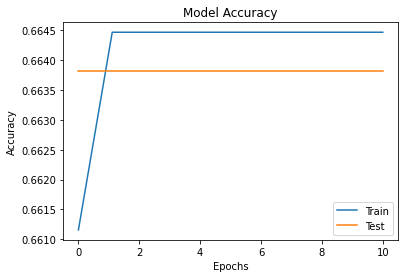

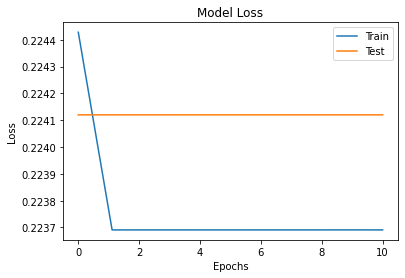

------------------Train classification report-----------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00       460
      NORMAL       0.00      0.00      0.00      1266
   PNEUMONIA       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00       116
      NORMAL       0.00      0.00      0.00       317
   PNEUMONIA       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



In [ ]:
print("------------------MSE loss function-----------------")
plot_result(history6)
print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model4)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model4)

# 9. Regularization
# 9.ii. Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.
L2 classes independent of the gradient of the loss function will make weights a little bit smaller each time an update is performed. and a model with small weights leads to a simple model and it will prevent overfitting.

In [ ]:

input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(layer)
layer = layers.Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(layer)
out = layers.Dense(3,activation='softmax',kernel_regularizer=regularizers.l2(0.0001))(layer)

model5 = models.Model(inputs= input_layer,outputs= out)
model5.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss= "categorical_crossentropy",
                  metrics=['accuracy'])

In [ ]:
history7 = model5.fit(TrainData,validation_data= TestData, epochs= 20)

Epoch 1/20
161/161 [==============================] - 191s 1s/step - loss: 1.8064 - accuracy: 0.7073 - val_loss: 0.4295 - val_accuracy: 0.9014
Epoch 2/20
161/161 [==============================] - 189s 1s/step - loss: 0.4617 - accuracy: 0.8849 - val_loss: 0.3375 - val_accuracy: 0.9309
Epoch 3/20
161/161 [==============================] - 186s 1s/step - loss: 0.4339 - accuracy: 0.8852 - val_loss: 0.4199 - val_accuracy: 0.8866
Epoch 4/20
161/161 [==============================] - 187s 1s/step - loss: 0.4050 - accuracy: 0.8858 - val_loss: 0.3403 - val_accuracy: 0.9177
Epoch 5/20
161/161 [==============================] - 186s 1s/step - loss: 0.3725 - accuracy: 0.8955 - val_loss: 0.4191 - val_accuracy: 0.8734
Epoch 6/20
161/161 [==============================] - 187s 1s/step - loss: 0.3696 - accuracy: 0.8952 - val_loss: 0.2831 - val_accuracy: 0.9146
Epoch 7/20
161/161 [==============================] - 187s 1s/step - loss: 0.3237 - accuracy: 0.9111 - val_loss: 0.2848 - val_accuracy: 0.9216

------------------Regularization-----------------


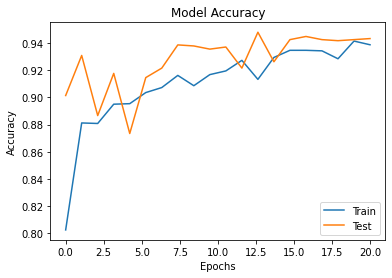

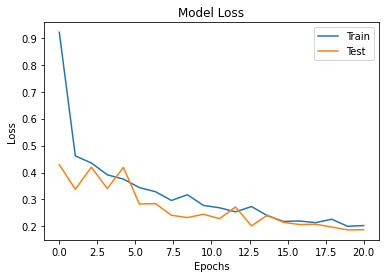

------------------Train classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.95      0.95      0.95       460
      NORMAL       0.93      0.91      0.92      1266
   PNEUMONIA       0.96      0.97      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.95      0.94      0.95      5144
weighted avg       0.95      0.95      0.95      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.91      0.91      0.91       116
      NORMAL       0.91      0.90      0.91       317
   PNEUMONIA       0.96      0.96      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.94      0.94      0.94      1288



In [ ]:
print("------------------Regularization-----------------")
plot_result(history7)
print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model5)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model5)

# 9. iii.
in this case it will select random nodes at each itteration and removes them from the model. so each set we train on a different dataset and overffiting will not happen.

In [ ]:

input_layer = layers.Input(shape=(80,80,1))
layer = layers.Flatten()(input_layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dropout(0.1)(layer)
layer = layers.Dense(1024,activation='relu')(layer)
layer = layers.Dropout(0.1)(layer)
out = layers.Dense(3,activation='softmax')(layer)

model6 = models.Model(inputs= input_layer,outputs= out)
model6.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss= "categorical_crossentropy",
                  metrics=['accuracy'])

In [ ]:
history8 = model6.fit(TrainData,validation_data= TestData, epochs= 20)

Epoch 1/20
161/161 [==============================] - 183s 1s/step - loss: 1.7656 - accuracy: 0.6809 - val_loss: 0.2746 - val_accuracy: 0.9092
Epoch 2/20
161/161 [==============================] - 185s 1s/step - loss: 0.3902 - accuracy: 0.8511 - val_loss: 0.2352 - val_accuracy: 0.9115
Epoch 3/20
161/161 [==============================] - 195s 1s/step - loss: 0.2976 - accuracy: 0.8848 - val_loss: 0.2344 - val_accuracy: 0.9169
Epoch 4/20
161/161 [==============================] - 195s 1s/step - loss: 0.3202 - accuracy: 0.8848 - val_loss: 0.1995 - val_accuracy: 0.9247
Epoch 5/20
161/161 [==============================] - 195s 1s/step - loss: 0.2792 - accuracy: 0.8848 - val_loss: 0.1864 - val_accuracy: 0.9348
Epoch 6/20
161/161 [==============================] - 196s 1s/step - loss: 0.2676 - accuracy: 0.8993 - val_loss: 0.1725 - val_accuracy: 0.9371
Epoch 7/20
161/161 [==============================] - 197s 1s/step - loss: 0.2733 - accuracy: 0.8978 - val_loss: 0.1861 - val_accuracy: 0.9270

------------------Drop Out-----------------


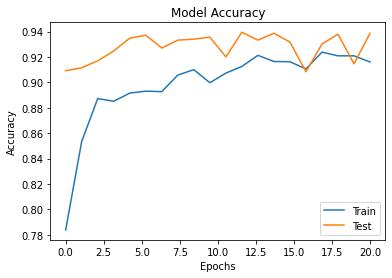

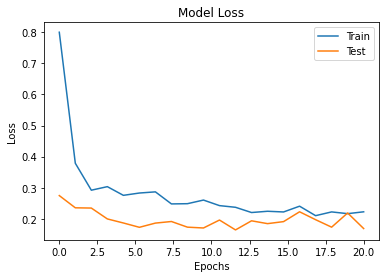

------------------Train classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.96      0.85      0.90       460
      NORMAL       0.96      0.81      0.88      1266
   PNEUMONIA       0.92      0.99      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.95      0.88      0.91      5144
weighted avg       0.93      0.93      0.93      5144

------------------Test classification report-----------------
              precision    recall  f1-score   support

     COVID19       0.98      0.86      0.92       116
      NORMAL       0.95      0.84      0.89       317
   PNEUMONIA       0.93      0.99      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.90      0.92      1288
weighted avg       0.94      0.94      0.94      1288



In [ ]:
print("------------------Drop Out-----------------")
plot_result(history8)
print("------------------Train classification report-----------------")
print_report(TrainData_unshuffle,model6)
print("------------------Test classification report-----------------")
print_report(TestData_unshuffle,model6)